# $$ CAGD \ Programming \ Homework $$     
### Name: Stein
### ID：I don't have one

## 1.  Bezier曲线的绘制

### 1.1导入需要的函数库

In [1]:
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1.2 定义线性Bezier函数

线性Bezier曲线其实就是两个点之间的一条线段，以t为参数，t属于(0,1)，而高阶的Bezier函数由低阶的Bezier函数线性组合而成


$$ 
线性Bezier函数: \ B(t) = (1 - t)P_1 + tP_2    
$$


In [2]:
def linear_bezier(point1, point2, t):
    return (1.0 - t) * point1 + t * point2

### 1.3定义一个函数，将控制顶点集从tuple转换为numpy向量形式，便于科学计算。

In [3]:
def points_as_arrays(point_tuples):
    return [np.array(point) for point in point_tuples]

### 1.4 定义一个函数，当控制顶点为两个时，给定参数t，计算出贝塞尔曲线上的点

In [4]:
def interpolate_control_points(points, t):
    return [ linear_bezier(point1, point2, t) for point1, point2 in zip(points, points[1:])]

In [5]:
def bezier(control_points, t):
    points = points_as_arrays(control_points)
    while len(points) > 2:        #当控制点个数为两个时，利用线性贝塞尔函数计算Bezier曲线上的点。
        points = interpolate_control_points(points, t)
    return linear_bezier(points[0], points[1], t)

### 1.5 画Bezier曲线

In [6]:
def plot_bezier_curve(control_points, **kwargs):
    #fig = plt.figure()
    x, y = list(zip(*control_points))
    T = np.linspace(0, 1, num=1000)  
    curve = [bezier(control_points, t) for t in T]
    curve_x, curve_y = zip(*curve)
    plt.title('Bezier Curve')
    plt.style.use('bmh')
    plt.plot(x, y) #画控制顶点之间的边
    plt.plot(x,y,'bo')#画控制顶点
    plt.plot(curve_x, curve_y,  color = 'r')
    plt.axis([np.min(x)-1,np.max(x)+1,np.min(y)-1,np.max(y)+1])
    plt.show()

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


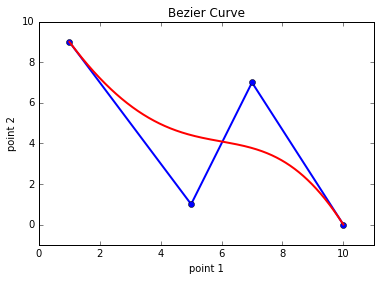

In [8]:
control_points = [(1,9),(5,1),(7,7),(10,0)]
plt.xlabel('point 1')
plt.ylabel('point 2')
plot_bezier_curve(control_points)

### 1.6  定义b_ij

In [10]:
def b_ij(i,j,control_points,t):
    points_init = points_as_arrays(control_points)
    points_temp = points_init
    if j == 0:
        return points_init[i]
    elif i >= j:
        for k in range(j):
            points_new = interpolate_control_points(points_temp, t)
            points_temp = points_new
        return points_temp[i-j]
    elif i < j:
        return b_ij(i,i,control_points,t) 

### 1.7 定义差分

In [11]:
def delta_b_ij(i,j,control_points):
    points = points_as_arrays(control_points)
    if j == 0:
        return  points[i]
    else:
        return delta_b_ij(i+1,j-1,control_points) - delta_b_ij(i,j-1,control_points)


### 1.8 定义阶乘函数

In [12]:
def factorial(n):
    if n == 1 or n==0:
        return 1
    else:
        return n*factorial(n-1)

### 1.8 求导矢量（Bezier曲线在参数t处的k阶导矢量）

In [13]:
def derivative_of_beizer(k,control_points,t):  
    L = []
    n = len(control_points) - 1
    for oo in range(n+1):
        h = b_ij(oo,n-k,control_points,t)
        L.append(h)
    L = L[k+1:]
    return delta_b_ij(0,k,L)*float(factorial(n)/factorial(n-k))

### 1.9 画导矢量+Bezier曲线

In [14]:
def plot_bezier_curve_deriv(k,control_points,**kwargs):
    # fig = plt.figure()
    x, y = list(zip(*control_points))
    T = np.linspace(0, 1, num=1000)  
    bezier_curve = [bezier(control_points, t) for t in T]
    derivative_curve = [derivative_of_beizer(k,control_points,t) for t in T]
    bezier_curve_x, bezier_curve_y = zip(*bezier_curve)
    derivative_curve_x, derivative_curve_y = zip(*derivative_curve)
    plt.style.use('bmh')
    plt.plot(x, y) #画控制顶点之间的边
    plt.plot(x,y,'bo')#画控制顶点
    plt.plot(bezier_curve_x, bezier_curve_y,  color = 'r')
    plt.plot(derivative_curve_x,derivative_curve_y, color = 'g')
    plt.axis([np.min(x)-20,np.max(x)+20,np.min(y)-20,np.max(y)+20])
    plt.title('The %d-Order Derivative'%k)
    plt.show()

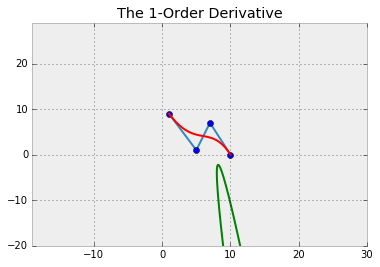

In [15]:
k = 1
plot_bezier_curve_deriv(k,control_points)


### 1.10 延拓

In [16]:
def plot_bezier_curve(control_points, **kwargs):
    #fig = plt.figure()
    x, y = list(zip(*control_points))
    T = np.linspace(-1, 2, num=1000)  
    curve = [bezier(control_points, t) for t in T]
    curve_x, curve_y = zip(*curve)
    plt.style.use('bmh')
    plt.plot(x, y) #画控制顶点之间的边
    plt.plot(x,y,'bo')#画控制顶点
    plt.plot(curve_x, curve_y,  color = 'r')
    plt.axis([np.min(x)-1,np.max(x)+1,np.min(y)-8,np.max(y)+8])
    plt.show()

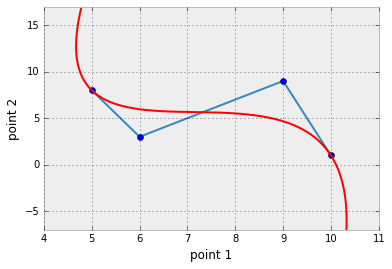

In [17]:
control_points = [(5, 8),(6,3),(9,9),(10,1)]
plt.xlabel('point 1')
plt.ylabel('point 2')
plot_bezier_curve(control_points)

### 1.11 画参数分割

In [18]:
def plot_bezier_curve_splitting(t0,control_points, **kwargs):
    #fig = plt.figure()
    x, y = list(zip(*control_points))
    plt.title('Bezier Curve')
    plt.style.use('bmh')
    plt.plot(x, y) #画控制顶点之间的边
    plt.plot(x,y,'bo')#画控制顶点
    T0 = np.linspace(0, t0, num=1000)  
    curve_pre = [bezier(control_points, t) for t in T0]
    curve_pre_x, curve_pre_y = zip(*curve_pre)
    plt.plot(curve_pre_x, curve_pre_y,  color = 'r')
    hj = bezier(control_points,t0)
    plt.plot(hj[0],hj[1],'bo')
    T1 = np.linspace(t0, 1, num = 1000)
    curve_next = [bezier(control_points,t) for t in T1 ]
    curve_next_x,curve_next_y = zip(*curve_next)
    plt.plot(curve_next_x, curve_next_y,  color = 'g')
    plt.axis([np.min(x)-1,np.max(x)+1,np.min(y)-1,np.max(y)+1])
    plt.show()    

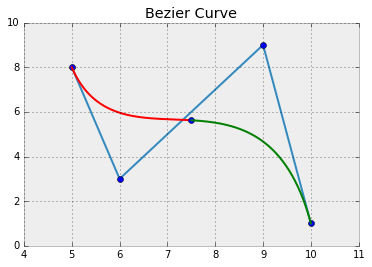

In [19]:
t0 = 0.5
plot_bezier_curve_splitting(t0,control_points)

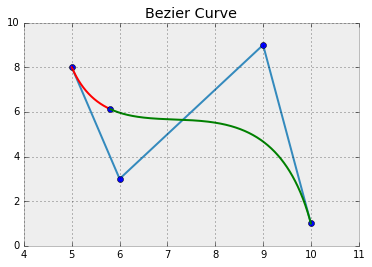

In [20]:
t0 = 0.2
plot_bezier_curve_splitting(t0,control_points)

### 1.12 Bezier曲线的升阶

In [21]:
def ascending_order_bezier(control_points,ascending_orders):
    points_init = points_as_arrays(control_points)
    if ascending_orders == 0:
        return points_init
    else:
        points_new = []
        points_temp = points_init
        for k in range(ascending_orders):  
            points_new = []
            n = len(points_temp) - 1
            points_new.insert(0,points_temp[0])
            for j in range(1,n+1):
                hj = linear_bezier(points_temp[j], points_temp[j-1], float(j)/(n+1))
                points_new.insert(j,hj)
            points_new.append(points_temp[-1])
            points_temp = points_new
        return points_new

In [22]:
def plot_bezier_curve_ascending_order(control_points,ascending_orders, **kwargs):
    #fig = plt.figure()
    x0, y0 = list(zip(*control_points))
    T = np.linspace(0, 1, num=1000)  
    curve = [bezier(control_points, t) for t in T]
    curve_x, curve_y = zip(*curve)
    control_points_ascending = ascending_order_bezier(control_points,ascending_orders)
    x1,y1 = list(zip(*control_points_ascending ))
    curve_ascending = [bezier(control_points_ascending,t) for t in T]
    curve_ascending_x,curve_ascending_y = zip(*curve_ascending)
    plt.title("Bezier Curve with it's %d-Order Ascending Form"%ascending_orders)
    plt.style.use('bmh')
    plt.plot(x0, y0) #画控制顶点之间的边
    plt.plot(x1, y1)
    plt.plot(x0,y0,'bo')#画控制顶点
    plt.plot(x1,y1,'yo')
    plt.plot(curve_x, curve_y,  color = 'k')
    plt.plot(curve_ascending_x,curve_ascending_y, color = 'g' )
    plt.axis([np.min(x0)-1,np.max(x0)+1,np.min(y0)-1,np.max(y0)+1])
    plt.show()
    

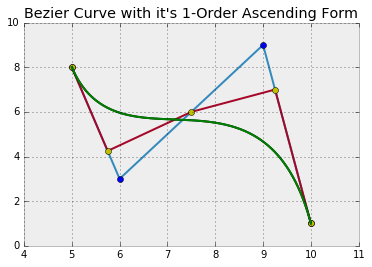

In [23]:
ascending_orders = 1
plot_bezier_curve_ascending_order(control_points,ascending_orders)

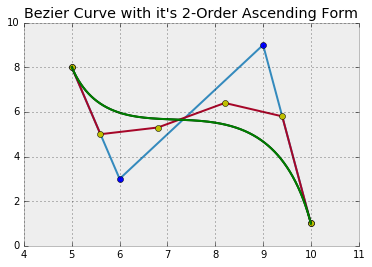

In [24]:
ascending_orders = 2
plot_bezier_curve_ascending_order(control_points,ascending_orders)

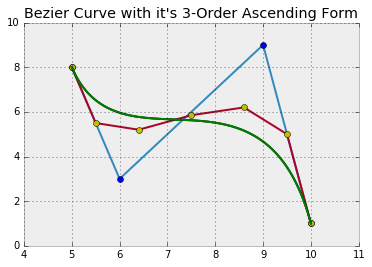

In [25]:
ascending_orders = 3
plot_bezier_curve_ascending_order(control_points,ascending_orders)

### 1.13 Bezier曲线的降阶

In [26]:
def descending_order_bezier(control_points,descending_orders):
    points_init = points_as_arrays(control_points)
    if descending_orders == 0:
        return points_init
    else:
        points_new = []
        points_temp_left = points_init
        points_temp_right = points_init
        for k in range(descending_orders):  
            points_new_left = []
            n = len(points_temp_left) - 1
            points_new_left.insert(0,points_temp_left[0])
            for j in range(1,n):
                hj_left = (float(n)*points_temp_left[j] - float(j)*points_new_left[j-1])/(n-j)
                points_new_left.insert(j,hj_left)
            points_temp_left = points_new_left
            m = len(points_temp_right) - 1
            points_new_right = [0]*m
            points_new_right[-1] = points_temp_right[-1]
            for oo in range(m-1,0,-1):
                hj_right = (float(m)*points_temp_right[oo] - float((m-oo))*points_new_right[oo])/oo
                points_new_right[oo-1] = hj_right
            points_temp_right = points_new_right
        for j in range(n):
            hj = (1 - float(j)/(n-1))*points_new_left[j] + points_new_right[j]*float(j)/(n-1)
            points_new.insert(j,hj)
        return points_new

### 1.14 Bezier 画Bezier 曲线降阶图

In [27]:
def plot_bezier_curve_descending_order(control_points,descending_orders, **kwargs):
    #fig = plt.figure()
    x0, y0 = list(zip(*control_points))
    T = np.linspace(0, 1, num=1000)  
    curve = [bezier(control_points, t) for t in T]
    curve_x, curve_y = zip(*curve)
    control_points_descending = descending_order_bezier(control_points,descending_orders)
    x1,y1 = list(zip(*control_points_descending ))
    curve_descending = [bezier(control_points_descending,t) for t in T]
    curve_descending_x,curve_descending_y = zip(*curve_descending)
    plt.title("Bezier Curve with it's %d-Order Descending Form"%descending_orders)
    plt.style.use('bmh')
    plt.plot(x0, y0) #画控制顶点之间的边
    plt.plot(x1, y1)
    plt.plot(x0,y0,'bo')#画控制顶点
    plt.plot(x1,y1,'yo')
    plt.plot(curve_x, curve_y,  color = 'k')
    plt.plot(curve_descending_x,curve_descending_y, color = 'g' )
    plt.axis([np.min(x0)-1,np.max(x0)+1,np.min(y0)-1,np.max(y0)+1])
    plt.show()

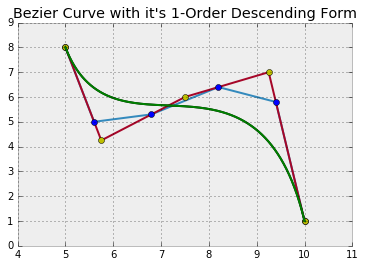

In [28]:
descending_orders = 1
control_points_ascending = ascending_order_bezier(control_points,2)
plot_bezier_curve_descending_order(control_points_ascending,descending_orders)

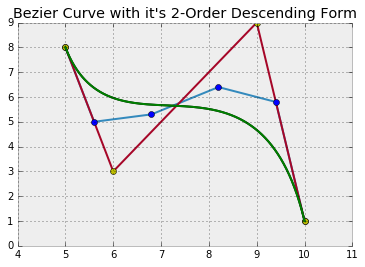

In [29]:
descending_orders = 2
control_points_ascending = ascending_order_bezier(control_points,2)
plot_bezier_curve_descending_order(control_points_ascending,descending_orders)

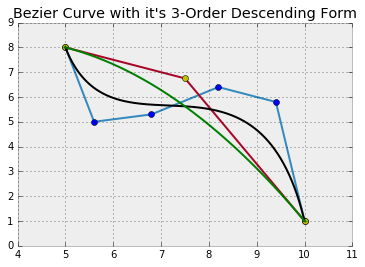

In [30]:
descending_orders = 3
control_points_ascending = ascending_order_bezier(control_points,2)
plot_bezier_curve_descending_order(control_points_ascending,descending_orders)

In [31]:
points_init = points_as_arrays(control_points)
points_temp_left = points_init
points_temp_right = points_init
m = len(control_points) - 1
points_new_right = [0]*m
print len(points_new_right)
points_new_right[-1] = points_temp_right[-1]
print points_new_right
print points_temp_right

3
[0, 0, array([10,  1])]
[array([5, 8]), array([6, 3]), array([9, 9]), array([10,  1])]


In [32]:
for oo in range(m,0,-1):
    hj_right = (m*points_temp_right[oo] - (m-oo)*points_new_right[oo-1])/oo
    points_new_right[oo-2] = hj_right
print points_new_right

[array([ 8, 13]), array([10,  1]), array([  2, -17])]


但是，Bezier曲线有两个缺点： 
1. Bezier curve surface cannot be modified locally.
2. It is very complex to satisfy geometric continuity conditions for Bezier curves or surfaces joining.


** B-Spline retains all advantages of Bezier curves, and overcomes the shortcomings of Bezier curves.**

## 2. 生成、显示平面的B样条曲线

### 2.1 导入需要的函数库

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

### 2.1 定义B-Spline Base function

In [35]:
'''
def b_spline_base_function(i,k,t,T):
    if k == 1:
        return 1 if T[i]<=t and t<T[i+1] else 0
    else:
        k -= 1
        return b_spline_base_function(i,k,t,T)*(t - T[i])/(T[i+k] - T[i]) + b_spline_base_function(i+1,k,t,T)*(T[i+k+1]-t)/(T[i+k+1]-T[i+1])
'''

'\ndef b_spline_base_function(i,k,t,T):\n    if k == 1:\n        return 1 if T[i]<=t and t<T[i+1] else 0\n    else:\n        k -= 1\n        return b_spline_base_function(i,k,t,T)*(t - T[i])/(T[i+k] - T[i]) + b_spline_base_function(i+1,k,t,T)*(T[i+k+1]-t)/(T[i+k+1]-T[i+1])\n'

In [36]:
def b_spline_base_function(i,k,t,T):
    if k == 1:
        return 1 if T[i]<=t and t<T[i+1] else 0
    else:
        return b_spline_base_function(i,k-1,t,T)*(t - T[i])/(T[i+k-1] - T[i]) + b_spline_base_function(i+1,k-1,t,T)*(T[i+k]-t)/(T[i+k]-T[i+1])

### 2.3 计算B-Spline曲线上的点

In [37]:
def points_as_arrays(point_tuples):
    return [np.array(point) for point in point_tuples]

def b_spline(t,k,control_points,degree):
    c_points =  points_as_arrays(control_points)
    P = np.zeros(2)
    T = np.linspace(0, 6, num=len(control_points)+degree)
    for i in range(len(c_points)):
        P += c_points[i]*b_spline_base_function(i,k,t,T)
    return P
        

### 2.4 画B-Spline曲线

In [38]:
def plot_b_spline_curve(control_points, **kwargs):
    fig = plt.figure()
    x, y = list(zip(*control_points))
    T = np.linspace(0, 6, num=len(control_points)+degree)
    time = np.linspace(T[2],T[-3] , num=1000)  
    #time = np.linspace(0,6 , num=1000)  
    curve = [b_spline(t,k,control_points,degree) for t in time]
    curve_x, curve_y = zip(*curve)
    plt.style.use('bmh')
    plt.plot(x, y) #画控制顶点之间的边
    plt.plot(x,y,'bo')#画控制顶点
    plt.plot(curve_x, curve_y,  color = 'r')
    plt.axis([np.min(x)-2,np.max(x)+2,np.min(y)-2,np.max(y)+2])
    plt.show()

In [40]:
#%pylab inline
plt.style.use('bmh')

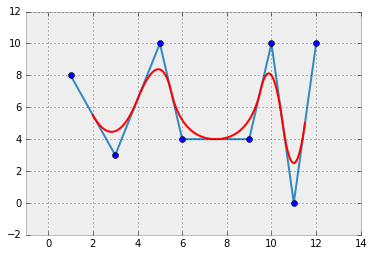

In [41]:
control_points = [(1,8),(3,3),(5,10),(6,4),(9,4),(10,10),(11,0),(12,10)]
degree = 3
k = degree
plot_b_spline_curve(control_points)

###2.5 画 B-Spline base function

In [42]:
def plot_b_spline_base_curve(control_points,i,k,degree):
    fig = plt.figure()
    time = np.linspace(0,6, num=10000)  
    T = np.linspace(0,6 , num=len(control_points)+degree)
    value = [b_spline_base_function(i,k,t,T) for t in time]
    plt.style.use('bmh')
    plt.plot(time,value,color = 'r')
    plt.axis([np.min(time)-0.1,np.max(time)+0.1,np.min(value)-0.1,np.max(value)+0.1])
    plt.show()

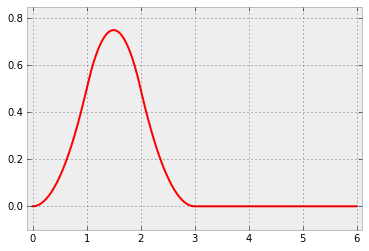

In [43]:
control_points = [(1,8),(3,3),(5,10),(9,1)]
degree = 3
i = 0
k = 3
plot_b_spline_base_curve(control_points,i,k,degree)

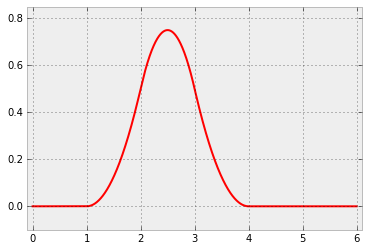

In [44]:
control_points = [(1,8),(3,3),(5,10),(9,1)]
degree = 3
i = 1
k = 3
plot_b_spline_base_curve(control_points,i,k,degree)

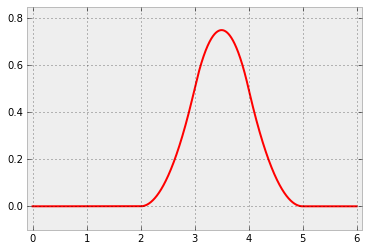

In [45]:
control_points = [(1,8),(3,3),(5,10),(9,1)]
degree = 3
i = 2
k = 3
plot_b_spline_base_curve(control_points,i,k,degree)

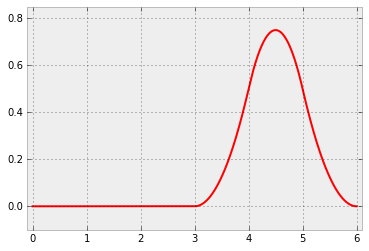

In [46]:
control_points = [(1,8),(3,3),(5,10),(9,1)]
degree = 3
i = 3
k = 3
plot_b_spline_base_curve(control_points,i,k,degree)

## 3. 生成、显示空间的B样条曲面

### 3.1 导入所需函数库

In [47]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

### 3.2 定义B-Spline base function

In [48]:
def b_spline_base_function(i,k,t,T):
    if k == 1:
        return 1 if T[i]<=t and t<T[i+1] else 0
    else:
        return b_spline_base_function(i,k-1,t,T)*(t - T[i])/(T[i+k-1] - T[i]) + b_spline_base_function(i+1,k-1,t,T)*(T[i+k]-t)/(T[i+k]-T[i+1])

### 3.3 计算B-Spline 曲面上的点

In [49]:
def points_as_arrays(point_tuples):
    return [np.array(point) for point in point_tuples]

def b_spline_surface(T_x,T_y,t_x,t_y,degree_x,degree_y,control_points,m):
    k_x = degree_x
    k_y = degree_y
    c_points =  points_as_arrays(control_points)
    P = np.zeros(3)
    ooo = 0
    i = -1
    j = 0
    for s in range(len(c_points)):
        if ooo == m:
            j += 1
            i = -1
            ooo = 0
        else:
            i += 1
            P += c_points[s]*b_spline_base_function(i,k_x,t_x,T_x)*b_spline_base_function(j,k_y,t_y,T_y)
            ooo += 1
    return P[2]

### 3.5 画B-Spline曲面

In [50]:
def plot_b_spline_surface(a,b,c,d,m,n,degree_x,degree_y,control_points):    
    time_x = np.linspace(a,b, num = 100)
    time_y = np.linspace(c,d, num = 100)
    tx,ty = np.meshgrid(time_x,time_y)
    
    T_x = np.linspace(a,b, num= m + degree_x)
    T_y = np.linspace(c,d, num= n + degree_y)

    surface = np.array([b_spline_surface(T_x,T_y,t_x,t_y,degree_x,degree_y,control_points,m) for t_x,t_y in zip(np.ravel(tx),np.ravel(ty))])
    plt.style.use('bmh')
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    Z = surface.reshape(tx.shape)
    d1,d2,d3 = zip(*control_points)
    ax.scatter(d1,d2,d3) #画控制顶点
    ax.plot_surface(tx, ty, Z,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('B-Spline Surface')
    plt.show()
    

In [51]:
def plot_B_Spline_Surface():
    a = float(raw_input('please input the start point of x-axis: '))
    b = float(raw_input('please input the end point of x-axis: '))
    c = float(raw_input('please input the start point of y-axis: '))
    d = float(raw_input('please input the end point of y-axis: '))
    m = int(raw_input('please input the desired num of control points along the x-axis: '))
    n = int(raw_input('please input the desired num of control points along the y-axis: '))
    degree_x = int(raw_input('please input the degree along the x-axis: '))
    degree_y = int(raw_input('please input the degree along the y-axis: '))
    hj = raw_input('Do you want to set the z-values one-by-one (y/n) ')
    X1 = np.linspace(a,b,num = m)
    Y1 = np.linspace(c,d,num = n)
    X,Y = np.meshgrid(X1,Y1)    
    if hj == 'n':
        print "Fine, we will generate the z-values randomly for you"
        Z = [10*random.random() for i in range(m*n)]
        control_points_gen = zip(np.ravel(X),np.ravel(Y),Z)
    else:
        Z = np.zeros([m,n])
        for i in range(m):
            for j in range(n):
                Z[i][j] = float(raw_input('please input the (%d, %d) element of Z-values'%(i, j)))
        control_points_gen = zip(np.ravel(X),np.ravel(Y),np.ravel(Z))
    print control_points_gen
                
    time_x = np.linspace(a,b, num = 100)
    time_y = np.linspace(c,d, num = 100)
    tx,ty = np.meshgrid(time_x,time_y)
    
    T_x = np.linspace(a,b, num= m + degree_x)
    T_y = np.linspace(c,d, num= n + degree_y)
    
    surface = np.array([b_spline_surface(T_x,T_y,t_x,t_y,degree_x,degree_y,control_points_gen, m) for t_x,t_y in zip(np.ravel(tx),np.ravel(ty))])
    
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    Z = surface.reshape(tx.shape)
    d1,d2,d3 = zip(*control_points_gen)
    ax.scatter(d1,d2,d3,'k') #画控制顶点
    ax.plot_surface(tx, ty, Z,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('B-Spline Surface')
    plt.show()    
        
        
        
        
        
        
    

please input the start point of x-axis: 1
please input the end point of x-axis: 9
please input the start point of y-axis: 5
please input the end point of y-axis: 14
please input the desired num of control points along the x-axis: 5
please input the desired num of control points along the y-axis: 5
please input the degree along the x-axis: 3
please input the degree along the y-axis: 4
Do you want to set the z-values one-by-one (y/n) n
Fine, we will generate the z-values randomly for you
[(1.0, 5.0, 9.785662990750136), (3.0, 5.0, 2.8675355954844606), (5.0, 5.0, 9.820480042638154), (7.0, 5.0, 0.28896385471648633), (9.0, 5.0, 9.855990850151484), (1.0, 7.25, 8.892932708109015), (3.0, 7.25, 1.870801723519443), (5.0, 7.25, 5.533644400303055), (7.0, 7.25, 0.5420864490126465), (9.0, 7.25, 7.073199886437987), (1.0, 9.5, 2.26155118104838), (3.0, 9.5, 9.81600947348069), (5.0, 9.5, 9.539168272290743), (7.0, 9.5, 5.5527862456745405), (9.0, 9.5, 4.708439374580534), (1.0, 11.75, 9.164834542111237), (3

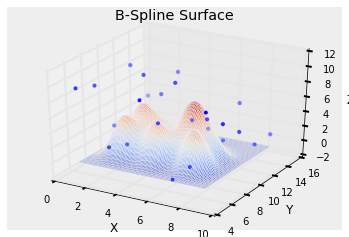

In [52]:
plot_B_Spline_Surface()

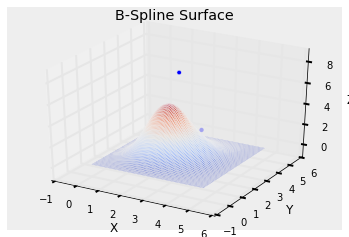

In [53]:
control_points = [(2.5,2.5,8),(3.5,2.5,3)]
plot_b_spline_surface(0,5,0,5,2,1,3,3,control_points)

# Below is my experiment of this notebook, you don't really want to look!

In [62]:
X = np.linspace(0,4,num = 5)
Y = np.linspace(0,5,num = 6)
X1,Y1 = np.meshgrid(X,Y)
print X1
print Y1
Z = [10*random.random() for i in range(5*6)] 
print zip(np.ravel(X1),np.ravel(Y1),Z)

[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]
[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]]
[(0.0, 0.0, 2.3492388459509916), (1.0, 0.0, 0.5222491644157834), (2.0, 0.0, 3.936816329414209), (3.0, 0.0, 0.7999513850756146), (4.0, 0.0, 5.519015267608404), (0.0, 1.0, 8.664545719526116), (1.0, 1.0, 7.126721252938304), (2.0, 1.0, 1.6203881740444825), (3.0, 1.0, 9.782686197117975), (4.0, 1.0, 0.7946209636622004), (0.0, 2.0, 5.3069104904581454), (1.0, 2.0, 5.969202138252246), (2.0, 2.0, 8.894285591414235), (3.0, 2.0, 7.406846588577675), (4.0, 2.0, 7.867562569054249), (0.0, 3.0, 4.27112578484947), (1.0, 3.0, 7.2045472133696995), (2.0, 3.0, 2.1942872287708592), (3.0, 3.0, 0.9671972972179532), (4.0, 3.0, 0.8123539690132076), (0.0, 4.0, 1.4566596896596717), (1.0, 4.0, 3.4532454836318474), (2.0, 4.0, 7.26582916015417)

In [76]:
np.zeros([5,6])

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
time_x = np.linspace(a,b, num = 100)
time_y = np.linspace(c,d, num = 100)
tx,ty = np.meshgrid(time_x,time_y)
for t_x,t_y in zip(np.ravel(tx),np.ravel(ty)):
    print t_x

0.0
0.040404040404
0.0808080808081
0.121212121212
0.161616161616
0.20202020202
0.242424242424
0.282828282828
0.323232323232
0.363636363636
0.40404040404
0.444444444444
0.484848484848
0.525252525253
0.565656565657
0.606060606061
0.646464646465
0.686868686869
0.727272727273
0.767676767677
0.808080808081
0.848484848485
0.888888888889
0.929292929293
0.969696969697
1.0101010101
1.05050505051
1.09090909091
1.13131313131
1.17171717172
1.21212121212
1.25252525253
1.29292929293
1.33333333333
1.37373737374
1.41414141414
1.45454545455
1.49494949495
1.53535353535
1.57575757576
1.61616161616
1.65656565657
1.69696969697
1.73737373737
1.77777777778
1.81818181818
1.85858585859
1.89898989899
1.93939393939
1.9797979798
2.0202020202
2.06060606061
2.10101010101
2.14141414141
2.18181818182
2.22222222222
2.26262626263
2.30303030303
2.34343434343
2.38383838384
2.42424242424
2.46464646465
2.50505050505
2.54545454545
2.58585858586
2.62626262626
2.66666666667
2.70707070707
2.74747474747
2.78787878788
2.82828282

In [16]:
surface = np.array([b_spline_surface(T_x,T_y,t_x,t_y,degree_x,degree_y,control_points) for t_x,t_y in zip(np.ravel(tx),np.ravel(ty))])

In [17]:
surface.shape

(10000L,)

In [18]:
surface.reshape(tx.shape)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   2.34229580e-06,   9.36918320e-06, ...,
          9.36918320e-06,   2.34229580e-06,   0.00000000e+00],
       [  0.00000000e+00,   9.36918320e-06,   3.74767328e-05, ...,
          3.74767328e-05,   9.36918320e-06,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [19]:
surface[9999]

0.0

NameError: name 'surface' is not defined

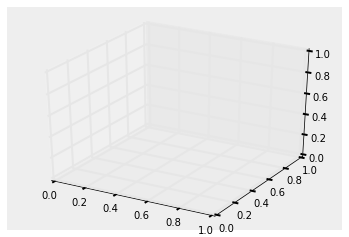

In [39]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
Z = surface.reshape(tx.shape)
d1,d2,d3 = zip(*control_points)
ax.scatter(d1,d2,d3) #画控制顶点
ax.plot_surface(tx, ty, Z,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('B-Spline Surface')
plt.show()

In [49]:
a = 0
b = 4
c = 0
d = 5
m = 4
n = 5
degree_x = 3
degree_y = 3
fig = plt.figure()
ax = fig.gca(projection = '3d')
e = control_points_generator(a,b,c,d,m,n,degree_x,degree_y)
d1,d2,d3 = zip(*e)
ax.scatter(d1,d2,d3)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

[(0.0, 0.0, 0.75267727148425767), (0.66666666666666663, 0.0, 0.19592868886689019), (1.3333333333333333, 0.0, 0.13496992317587098), (2.0, 0.0, 0.37165650189881938), (2.6666666666666665, 0.0, 0.2417633506799588), (3.333333333333333, 0.0, 0.583203955796322), (4.0, 0.0, 0.41128995198891627), (0.0, 0.625, 0.70117776011440203), (0.66666666666666663, 0.625, 0.42686532253212328), (1.3333333333333333, 0.625, 0.40353903674052671), (2.0, 0.625, 0.16933751683795895), (2.6666666666666665, 0.625, 0.6333419056295041), (3.333333333333333, 0.625, 0.69202380658413465), (4.0, 0.625, 0.7760951145056203), (0.0, 1.25, 0.21295391616337334), (0.66666666666666663, 1.25, 0.3744529150209992), (1.3333333333333333, 1.25, 0.27597952065418196), (2.0, 1.25, 0.74561314326068839), (2.6666666666666665, 1.25, 0.59782886549274317), (3.333333333333333, 1.25, 0.40467286716497364), (4.0, 1.25, 0.79778062814383244), (0.0, 1.875, 0.79586849401756066), (0.66666666666666663, 1.875, 0.66966821909523377), (1.3333333333333333, 1.87

In [39]:
ddd.shape

(63L, 3L)

In [44]:
for i in ddd:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-44-3031d68577d3>, line 1)

In [56]:
5%3

2

In [19]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [42]:
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])

In [43]:
zs.shape

(14400L,)

In [44]:
X.shape

(120L, 120L)

In [16]:
f = X.shape[0]*X.shape[1]
Z = np.random.random(size = f)
Z = Z.reshape(X.shape)
omg =  zip(np.ravel(X), np.ravel(Y),np.ravel(Z))
fig = plt.figure()
ax = fig.gca(projection = '3d')
x,y,z = zip(*omg)
ax.scatter(x,y,z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

0